## ARIMA (Auto Regressive Integrated Moving Average)

Some great tutorials
 * https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
 * https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/
 * https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp

 * **Autoregression (AR)** refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.
 * **Integrated (I)** represents the differencing of raw observations to allow for the time series to become stationary, i.e., data values are replaced by the difference between the data values and the previous values.
 * **Moving average (MA)** incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pyramid.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IPG2211A2N&scale=left&cosd=1939-01-01&coed=2019-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-05-27&revision_date=2019-05-27&nd=1939-01-01')

In [3]:
df.index = pd.to_datetime(df['DATE'])
del df['DATE']
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [4]:
df.columns = ['energy']

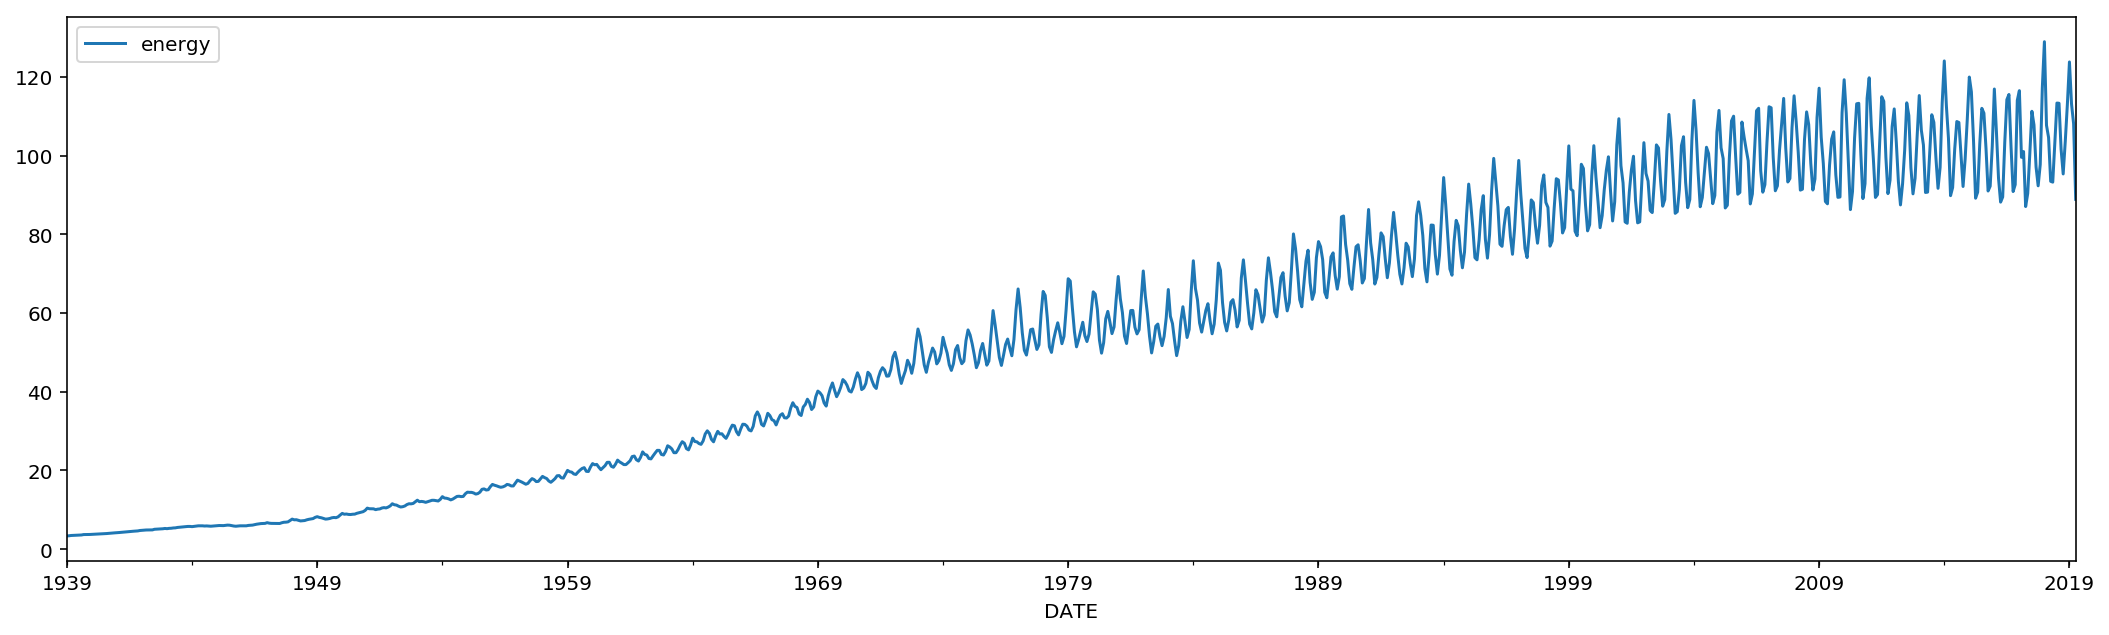

In [5]:
df.plot(figsize=(18,5));

### Time Series Decomposition

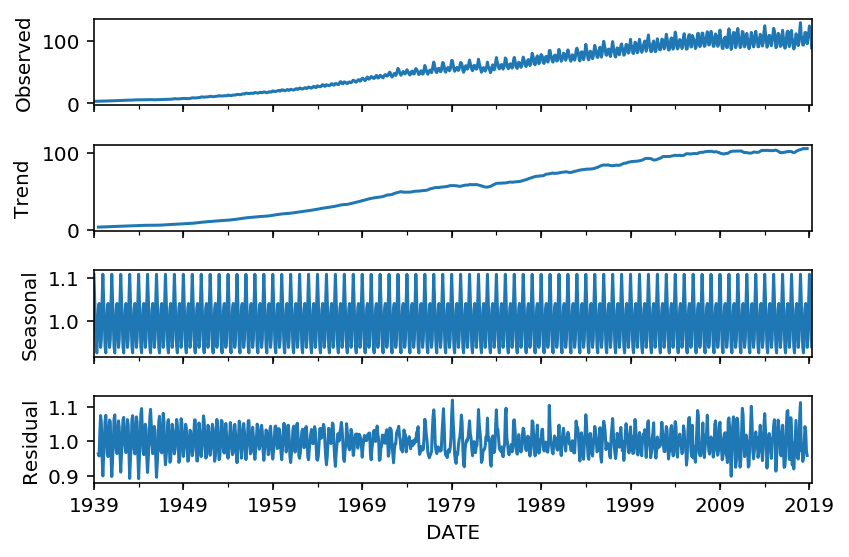

In [74]:
result = seasonal_decompose(df, model='multiplicative')
# plot too small
result.plot(); 

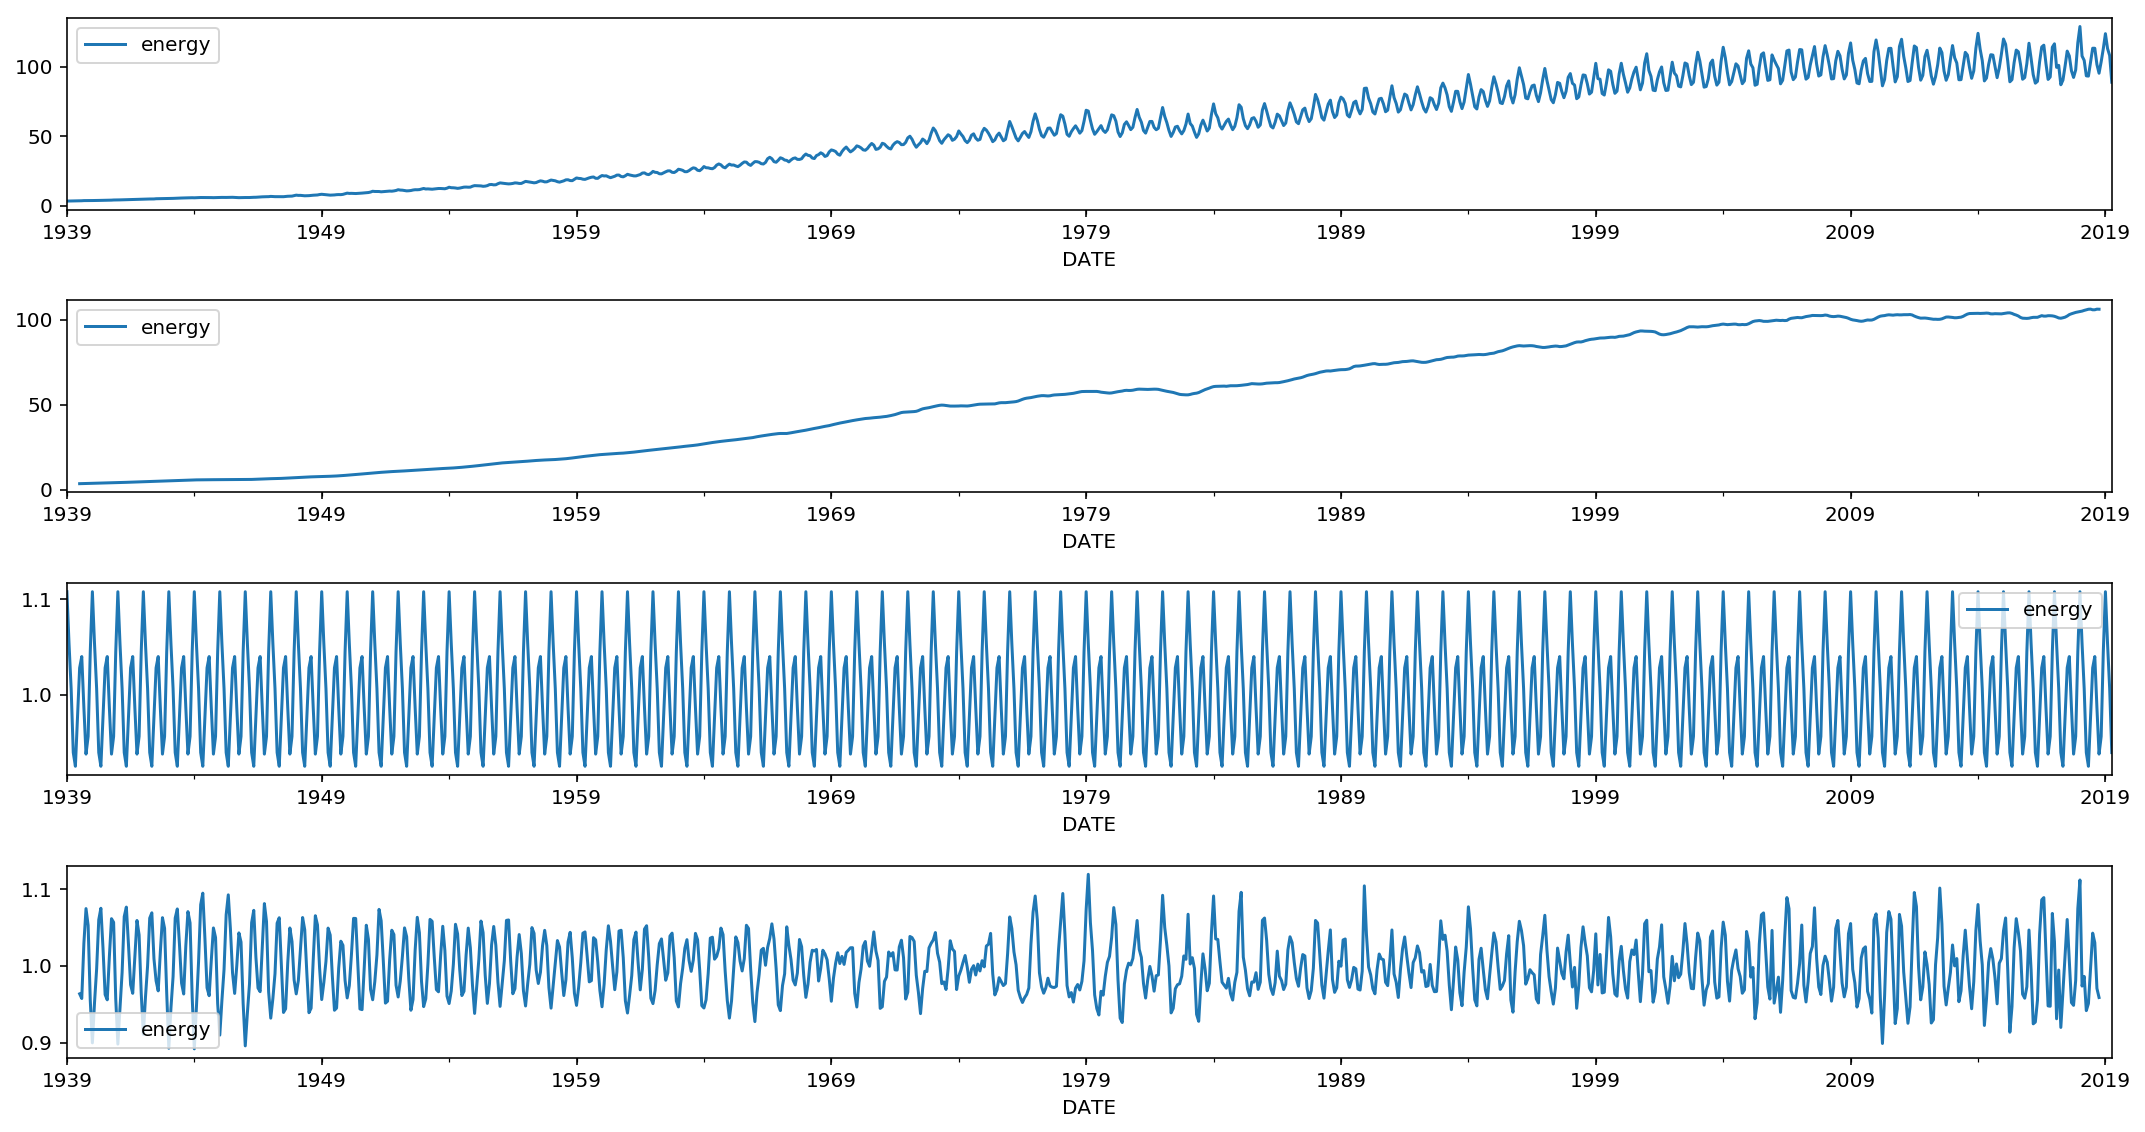

In [75]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))

result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

### Grid Search on Seasonal-ARIMA

 * p: the number of lag observations in the model; also known as the lag order.
 * d: the number of times that the raw observations are differenced; also known as the degree of differencing.
 * q: the size of the moving average window; also known as the order of the moving average.
 
P, D, Q are the same but applied to the seasonal component

A 0 value, which can be used as a parameter, would mean that particular component should not be used in the model. This way, the ARIMA model can be constructed to perform the function of an ARMA model, or even simple AR, I, or MA models.

In [60]:
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1696.799, BIC=1716.380, Fit time=2.156 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1905.210, BIC=1913.043, Fit time=0.050 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1846.529, BIC=1862.193, Fit time=0.532 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1753.642, BIC=1769.307, Fit time=0.484 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1697.525, BIC=1721.022, Fit time=2.169 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1823.410, BIC=1839.075, Fit time=0.647 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1696.702, BIC=1720.199, Fit time=6.050 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1753.310, BIC=1772.891, Fit time=1.953 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1696.919, BIC=1724.332, Fit time=7.799 seconds
Fit ARIMA: order=(1, 1, 0) s

In [62]:
train = df.loc['1985-01-01':'2016-12-01']
test = df.loc['2017-01-01':]

In [63]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [64]:
future_forecast = stepwise_model.predict(n_periods=len(test))
print(future_forecast)

[ 121.91373914  109.73318928   99.91022986   89.78300901   91.34904595
  102.67865546  112.19796685  111.92715349  100.61207817   91.53176558
   95.32048952  111.28243495  120.08644813  110.87324444  101.51260018
   89.74671553   91.4456544   102.44932071  111.62638699  110.82306018
  100.41254958   91.42783521   95.07423943  108.63648529  118.86772463
  109.88764401  100.10260846   89.2214739 ]


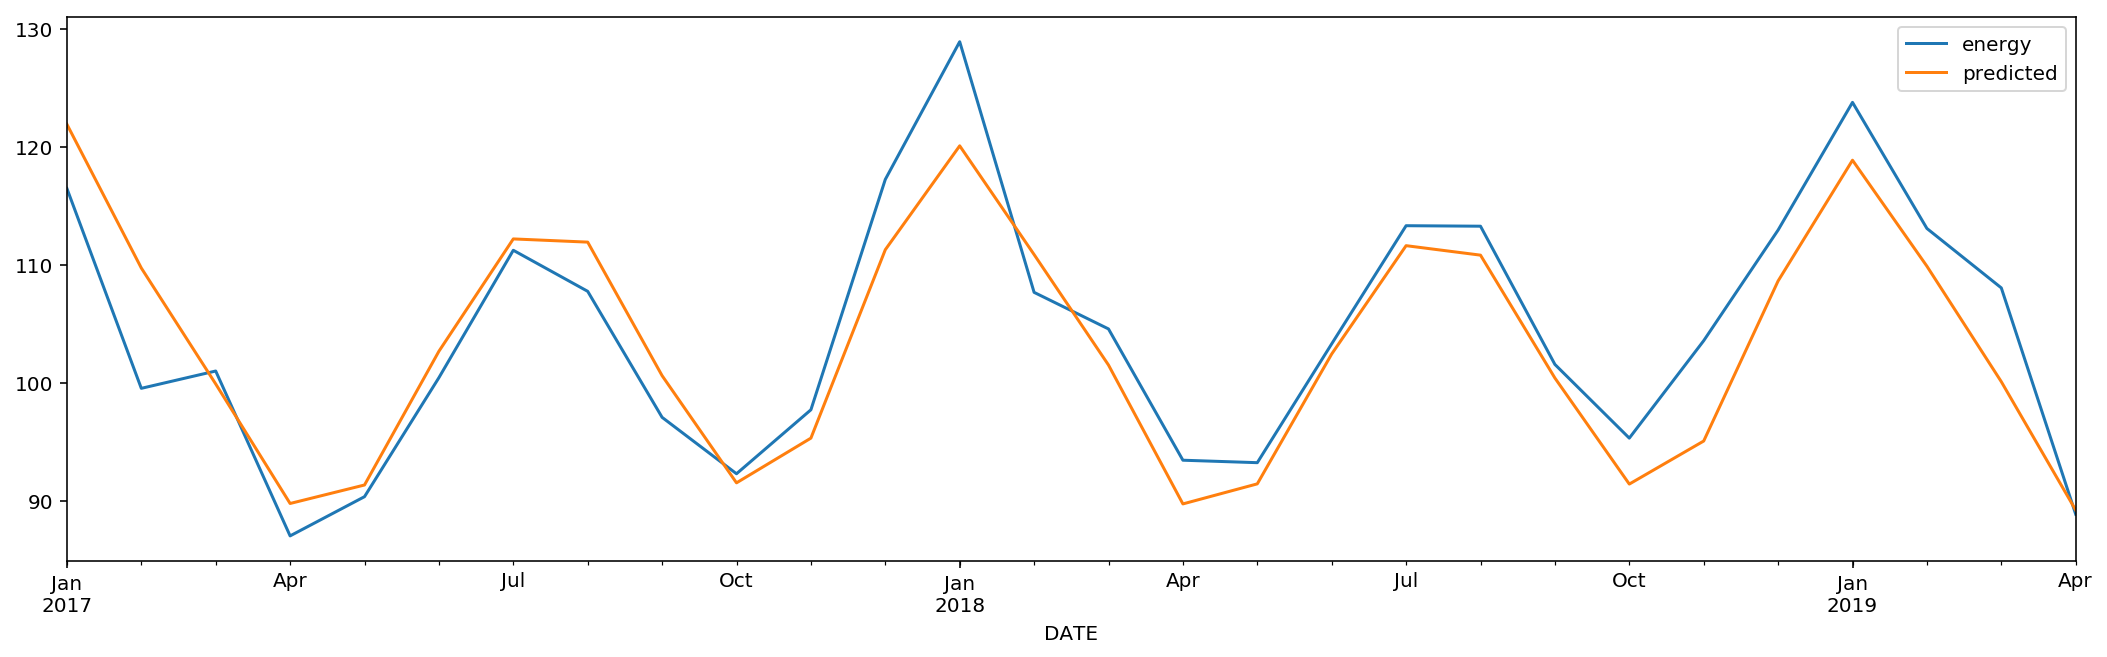

In [65]:
future_forecast = pd.DataFrame(future_forecast, index = test.index,columns=['predicted'])
pd.concat([test,future_forecast],axis=1).plot(figsize=(18,5));

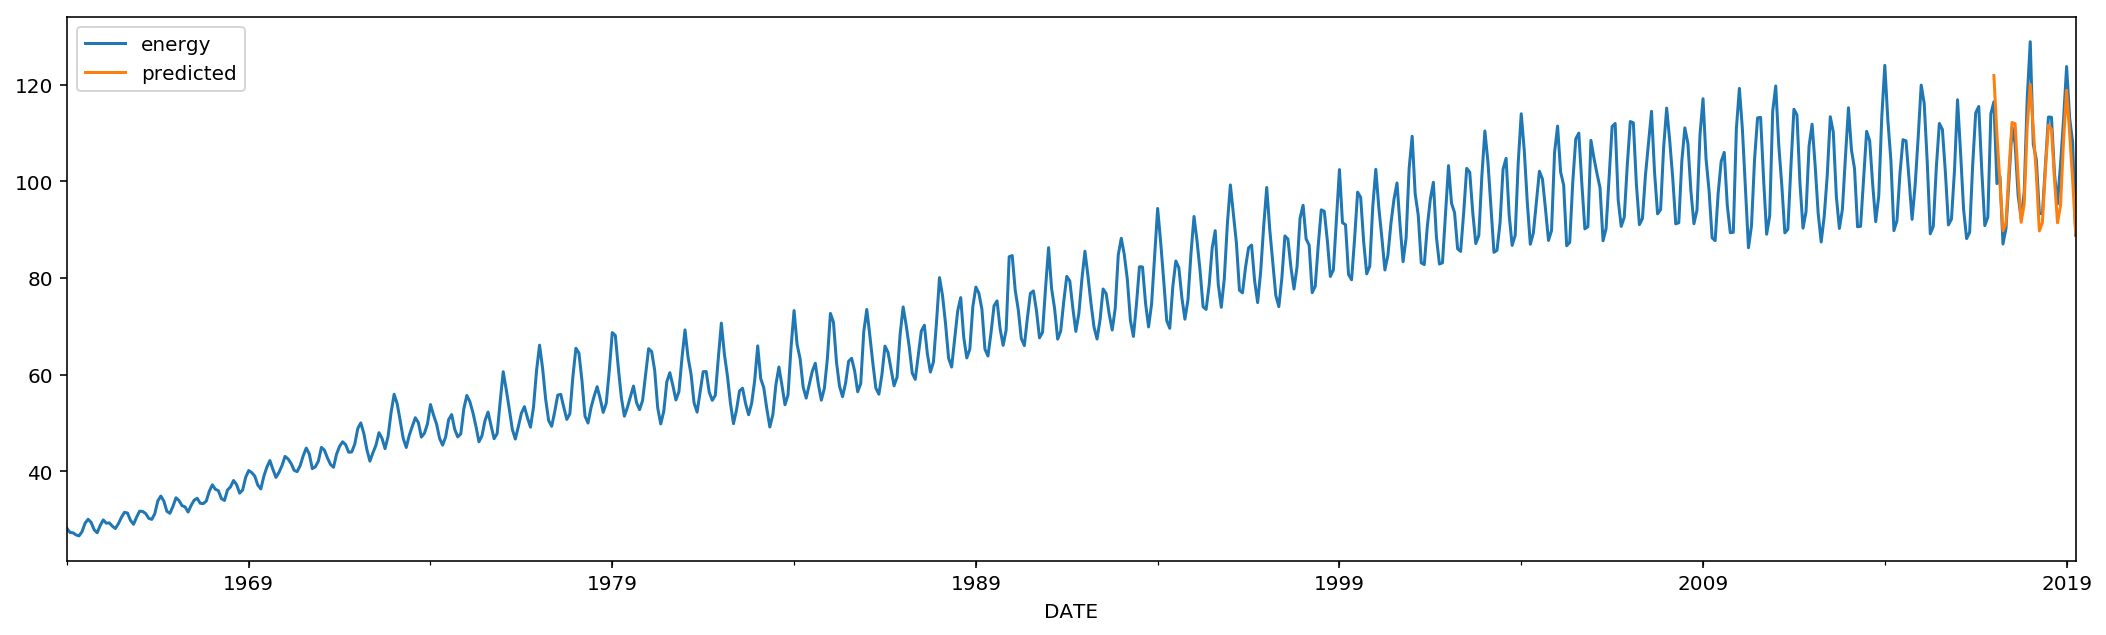

In [66]:
pd.concat([df,future_forecast],axis=1)[300:].plot(figsize=(18,5));

### Evaluation using RMSE

In [67]:
rms = sqrt(mean_squared_error(test,future_forecast))
print(rms)

4.430535335496082
